In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [87]:
import pandas as pd
import numpy as np

In [5]:
P1 = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Project 1 Data/sales_predictions.csv")
P1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
P1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
P1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
#delete duplicates
P1.duplicated().any()

False

In [9]:
P1.isna().sum()
#"Item_Weight" (1463) and "Outlet_Size" (2410) has blanks 
#Pull in average of "Item_weight" and just plug in 0 for "Outlet_Size"? 


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
Item_Mean = P1.Item_Weight.mean()
Item_Mean

12.857645184136183

In [11]:
(1463/8523)*100
#Total number of 'NaN' divided by the Total N
#This is a high percent so I don't think I should replace all the missing N with the Mean (review)

17.165317376510618

In [12]:
P1["Item_Weight"].fillna(Item_Mean, inplace=True)
P1.head(30)
#add  , inplace=True) - once okay to add

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [13]:
P1.Outlet_Size.value_counts()
#Since there are 2410 missing values, I think we will have to create a fourth neutral variable like 'Not Specified' 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
P1["Outlet_Size"].fillna("Not Specified", inplace=True)
P1.head()
#add  , inplace=True) - once okay to add

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not Specified,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
P1.Item_Identifier.value_counts()

FDW13    10
FDG33    10
DRE49     9
FDQ40     9
FDX20     9
         ..
FDO33     1
FDQ60     1
FDT35     1
FDN52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
P1.Item_Fat_Content.value_counts()
#need to sum the the different text items

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
P1.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], value = "Low Fat", inplace = True)
P1.Item_Fat_Content.head(30)

0     Low Fat
1     Regular
2     Low Fat
3     Regular
4     Low Fat
5     Regular
6     Regular
7     Low Fat
8     Regular
9     Regular
10    Low Fat
11    Regular
12    Regular
13    Regular
14    Low Fat
15    Regular
16    Low Fat
17    Regular
18    Low Fat
19    Low Fat
20    Regular
21    Regular
22    Low Fat
23    Low Fat
24    Regular
25    Low Fat
26    Regular
27    Low Fat
28    Regular
29    Regular
Name: Item_Fat_Content, dtype: object

In [18]:
P1.Item_Fat_Content.replace(to_replace = ["reg"], value = "Regular", inplace = True)
P1.Item_Fat_Content.value_counts()
#Wooo, changed properly

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
P1.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [20]:
P1.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
P1.Item_MRP.value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [22]:
P1.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
P1.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [24]:
P1.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [25]:
P1.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
P1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not Specified,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
P1["Item_Type"].nunique()

16

In [29]:
Dairy = P1["Item_Type"] == "Dairy"
Dairy

0        True
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Type, Length: 8523, dtype: bool

In [30]:
Meat = P1["Item_Type"] == "Meat"
Meat

0       False
1       False
2        True
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Type, Length: 8523, dtype: bool

In [31]:
Fruits_Veggies = P1["Item_Type"] == "Fruits and Vegetables"
Fruits_Veggies

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Type, Length: 8523, dtype: bool

In [32]:
Item_Sales = P1["Item_Outlet_Sales"] > 0
Item_Sales

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Name: Item_Outlet_Sales, Length: 8523, dtype: bool

In [33]:
Product_Dairy = P1.loc[Dairy & Item_Sales]
Product_Meat = P1.loc[Meat & Item_Sales]
Product_Fruit_Veggies = P1.loc[Fruits_Veggies & Item_Sales]
#Product_Fruit_Veggies.head()
Product_Fruit_Veggies.count()

Item_Identifier              1232
Item_Weight                  1232
Item_Fat_Content             1232
Item_Visibility              1232
Item_Type                    1232
Item_MRP                     1232
Outlet_Identifier            1232
Outlet_Establishment_Year    1232
Outlet_Size                  1232
Outlet_Location_Type         1232
Outlet_Type                  1232
Item_Outlet_Sales            1232
dtype: int64

In [34]:
#break by 100000 for graphing
Dairy_Sales = ((Product_Dairy["Item_Outlet_Sales"].sum())/100000)
Dairy_Sales


15.225940512

In [35]:
#break by 100000 for graphing
Meat_Sales = ((Product_Meat["Item_Outlet_Sales"].sum())/100000)
Meat_Sales

9.17565612

In [36]:
#break by 100000 for graphing
Fruits_Veggies_Sales = ((Product_Fruit_Veggies["Item_Outlet_Sales"].sum())/100000)
Fruits_Veggies_Sales

28.200598168000003

In [37]:
#create a dictionary assigning values
Item_Dict = {"Fruits & Vegetables": Fruits_Veggies_Sales, "Dairy": Dairy_Sales, "Meat": Meat_Sales}
print(Item_Dict)

{'Fruits & Vegetables': 28.200598168000003, 'Dairy': 15.225940512, 'Meat': 9.17565612}


In [38]:
# Keys and values pull from the dict above
Keys = Item_Dict.keys()
Values = Item_Dict.values()

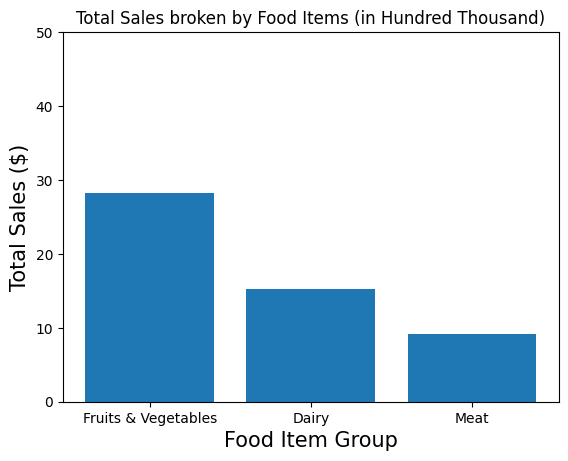

In [39]:
plt.style.use("default")
plt.bar(Keys, Values);
plt.ylim(bottom = 0, top =50);
plt.xlabel("Food Item Group", fontsize = 15);
plt.ylabel("Total Sales ($)", fontsize = 15);
plt.title("Total Sales broken by Food Items (in Hundred Thousand)");
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [40]:
Low_Fat = P1["Item_Fat_Content"] == "Low Fat"
Regular = P1["Item_Fat_Content"] == "Regular"
Low_Fat

0        True
1       False
2        True
3       False
4        True
        ...  
8518     True
8519    False
8520     True
8521    False
8522     True
Name: Item_Fat_Content, Length: 8523, dtype: bool

In [41]:
Content_LowFat = P1.loc[Low_Fat & Item_Sales]
Content_Regular = P1.loc[Regular & Item_Sales]
Content_LowFat.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [42]:
LowFat_Sales = ((Content_LowFat["Item_Outlet_Sales"].sum())/100000)
RegularFat_Sales = ((Content_Regular["Item_Outlet_Sales"].sum())/100000)
RegularFat_Sales

66.870308774

In [43]:
Content_Dict = {"Low Fat": LowFat_Sales, "Regular": RegularFat_Sales}
print(Content_Dict)

{'Low Fat': 119.04094533, 'Regular': 66.870308774}


In [44]:
Keys2 = Content_Dict.keys()
Values2 = Content_Dict.values()

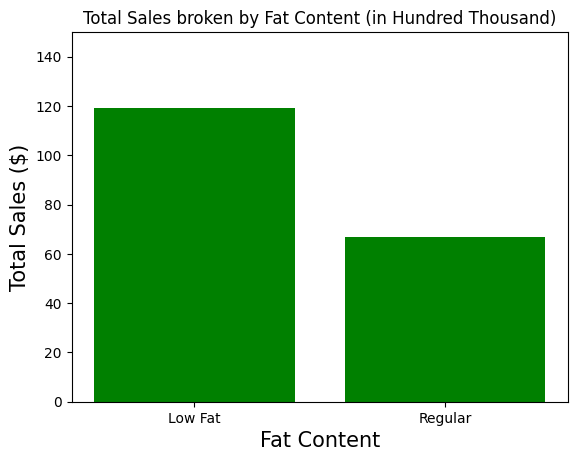

In [45]:
plt.style.use("default")
plt.bar(Keys2, Values2, color = 'green');
plt.ylim(bottom = 0, top =150);
plt.xlabel("Fat Content", fontsize = 15);
plt.ylabel("Total Sales ($)", fontsize = 15);
plt.title("Total Sales broken by Fat Content (in Hundred Thousand)");
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [46]:
P1.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [47]:
Type1 = P1["Outlet_Type"] == "Supermarket Type1"
Type2 = P1["Outlet_Type"] == "Supermarket Type2"
Type3 = P1["Outlet_Type"] == "Supermarket Type3"
Type_Grocery_Store = P1["Outlet_Type"] == "Grocery Store"
Type_Grocery_Store

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Type, Length: 8523, dtype: bool

In [48]:
Store_Type1 = P1.loc[Type1 & Item_Sales]
Store_Type2 = P1.loc[Type2 & Item_Sales]
Store_Type3 = P1.loc[Type3 & Item_Sales]
Grocery_Store = P1.loc[Type_Grocery_Store & Item_Sales]
Grocery_Store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not Specified,Tier 3,Grocery Store,732.3800
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925000,Regular,0.161467,Dairy,45.5086,OUT010,1998,Not Specified,Tier 3,Grocery Store,178.4344
29,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250000,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Not Specified,Tier 3,Grocery Store,163.7868


In [49]:
Type1_Sales = ((Store_Type1["Item_Outlet_Sales"].sum())/100000)
Type2_Sales = ((Store_Type2["Item_Outlet_Sales"].sum())/100000)
Type3_Sales = ((Store_Type3["Item_Outlet_Sales"].sum())/100000)
Grocery_Store_Sales = ((Grocery_Store["Item_Outlet_Sales"].sum())/100000)
Type3_Sales

34.539260514000006

In [50]:
Store_Dict = {"Supermarket Type 1": Type1_Sales, "Supermarket Type 2": Type2_Sales, "Supermarket Type 3": Type3_Sales, "Grocery Store": Grocery_Store_Sales}
print(Store_Dict)

{'Supermarket Type 1': 129.17342263, 'Supermarket Type 2': 18.5182283, 'Supermarket Type 3': 34.539260514000006, 'Grocery Store': 3.68034266}


In [51]:
Keys3 = Store_Dict.keys()
Values3 = Store_Dict.values()

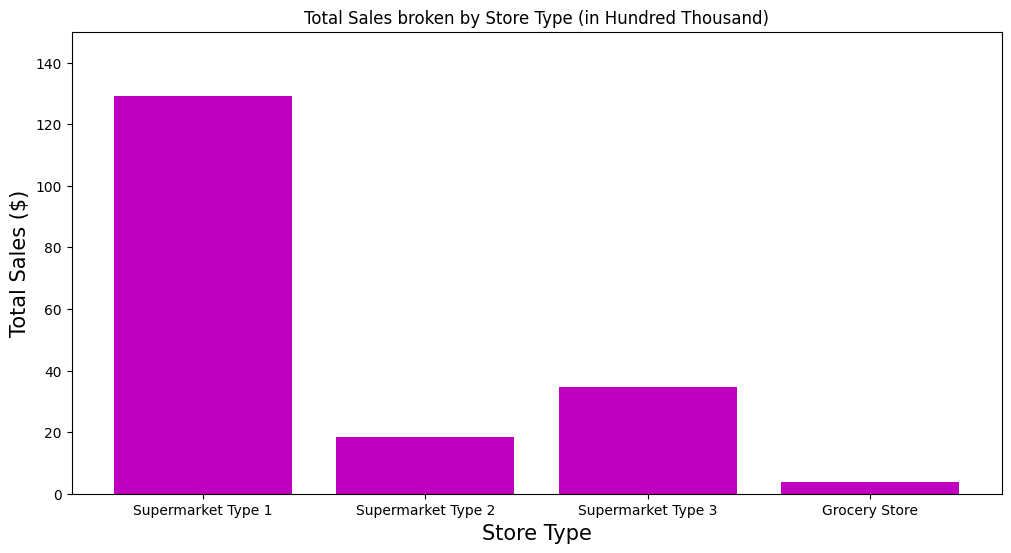

In [52]:
fig= plt.figure(figsize=(12,6))
plt.style.use("default")
plt.bar(Keys3, Values3, color = "m");
plt.ylim(bottom = 0, top =150);
plt.xlabel("Store Type", fontsize = 15);
plt.ylabel("Total Sales ($)", fontsize = 15);
plt.title("Total Sales broken by Store Type (in Hundred Thousand)");
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
Meat_df = P1[P1["Item_Type"] == "Meat"]
Meat_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
41,FDK43,9.800,Low Fat,0.026818,Meat,126.0020,OUT013,1987,High,Tier 3,Supermarket Type1,2150.5340
61,FDV27,7.970,Regular,0.040071,Meat,87.3514,OUT045,2002,Not Specified,Tier 2,Supermarket Type1,1062.6168
66,FDH19,19.350,Low Fat,0.033082,Meat,172.5738,OUT035,2004,Small,Tier 2,Supermarket Type1,4865.6664
89,FDN27,20.850,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
...,...,...,...,...,...,...,...,...,...,...,...,...
8443,FDX15,17.200,Low Fat,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404
8460,FDN39,19.350,Regular,0.065508,Meat,168.9816,OUT035,2004,Small,Tier 2,Supermarket Type1,2852.2872
8470,FDW27,5.860,Regular,0.151088,Meat,155.1314,OUT049,1999,Medium,Tier 1,Supermarket Type1,1551.3140
8491,FDO03,10.395,Regular,0.037033,Meat,227.9352,OUT018,2009,Medium,Tier 3,Supermarket Type2,4809.7392


In [55]:
Dairy_df = P1[P1["Item_Type"] == "Dairy"]
Dairy_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Not Specified,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Not Specified,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8424,FDC39,7.405,Low Fat,0.159165,Dairy,207.1296,OUT035,2004,Small,Tier 2,Supermarket Type1,3739.1328
8447,FDS26,20.350,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Not Specified,Tier 2,Supermarket Type1,7588.1226
8448,FDV50,14.300,Low Fat,0.123071,Dairy,121.1730,OUT018,2009,Medium,Tier 3,Supermarket Type2,2093.9410
8457,FDY50,5.800,Low Fat,0.130931,Dairy,89.9172,OUT035,2004,Small,Tier 2,Supermarket Type1,1516.6924


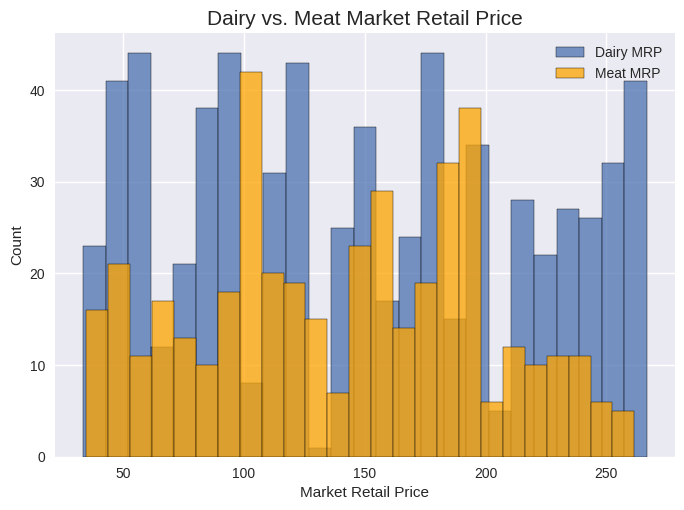

In [56]:
plt.style.use("seaborn")
sns.histplot(Dairy_df["Item_MRP"], 
            label = "Dairy MRP",
            bins = 25, 
            edgecolor='black');
sns.histplot(Meat_df["Item_MRP"],
            label = "Meat MRP", 
            bins = 25, 
            edgecolor='black', 
            color='orange');
plt.xlabel("Market Retail Price");
plt.ylabel("Count");
plt.legend();
plt.title("Dairy vs. Meat Market Retail Price", fontsize = 15);

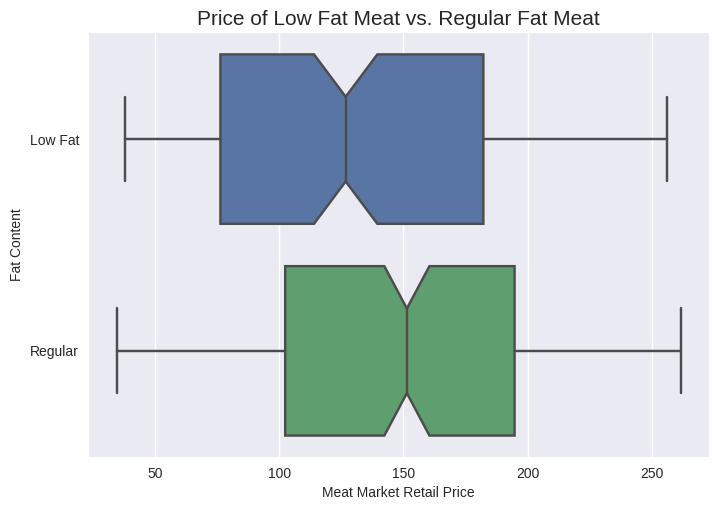

In [57]:
#Looking at price of meats vs. the fat content
sns.boxplot(x='Item_MRP', y='Item_Fat_Content', data=Meat_df, notch = True);
plt.xlabel("Meat Market Retail Price", fontsize = 10);
plt.ylabel("Fat Content", fontsize = 10);
plt.title("Price of Low Fat Meat vs. Regular Fat Meat", fontsize = 15);

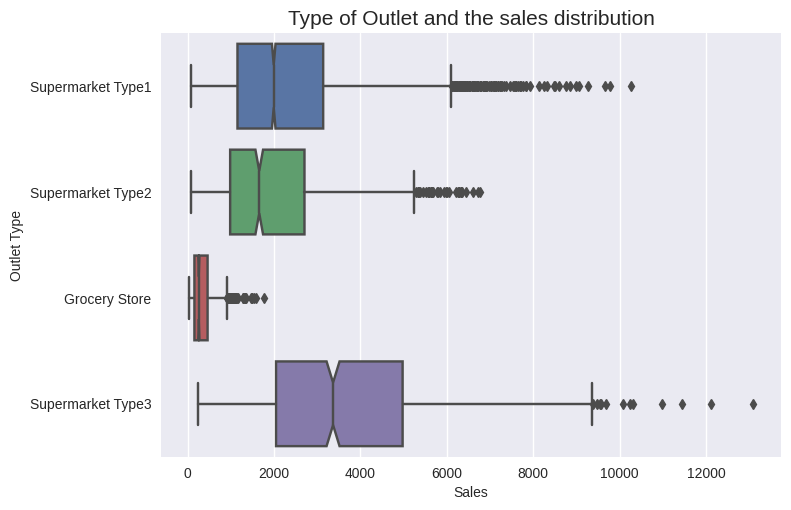

In [58]:
sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Type', data=P1, notch = True);
plt.xlabel("Sales", fontsize = 10);
plt.ylabel("Outlet Type", fontsize = 10);
plt.title("Type of Outlet and the sales distribution", fontsize = 15);


In [59]:
corr = Meat_df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.008741,0.048233,0.002739,-0.001113
Item_Visibility,0.008741,1.000000,-0.026564,-0.092069,-0.049886
Item_MRP,0.048233,-0.026564,1.000000,0.007785,0.542219
Outlet_Establishment_Year,0.002739,-0.092069,0.007785,1.000000,-0.084264
Item_Outlet_Sales,-0.001113,-0.049886,0.542219,-0.084264,1.000000


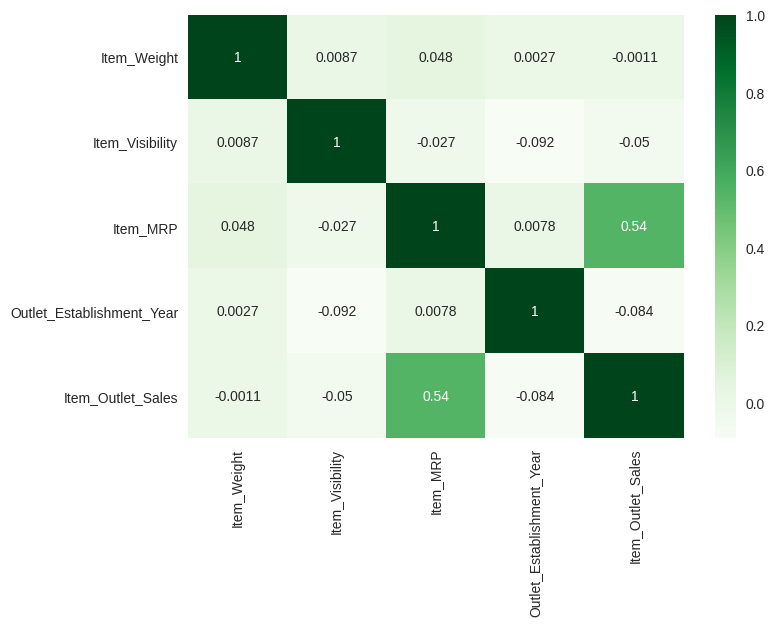

In [60]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

In [61]:
P1.corr().sort_values(by = ["Item_Outlet_Sales"])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [62]:
#pick out specific columns
P1_Stat = P1.loc[:, ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]]
P1_Stat.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [63]:
P1_Stat.shape

(8523, 5)

In [64]:
#Get features grid
X = P1_Stat.loc[:, ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]].values
X.shape

(8523, 4)

In [105]:
#get the target vector
y = P1_Stat.loc[:, ["Item_Outlet_Sales"]].values
y.shape

(8523, 1)

In [106]:
y = np.ravel(y, order='C')

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [108]:
#instantiaite
Lin_reg = LinearRegression(fit_intercept = True)
#Fit a model
Lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
#Linear Regression output - R2 since not categorical
prediction = Lin_reg.predict(X)
Lin_reg.score(X,y)

0.3423251529808904

In [110]:
#work on KNN
stdscaler = StandardScaler()
stdscaler.fit(X)
X = stdscaler.transform(X);

In [111]:
KNN_Reg = KNeighborsRegressor()
KNN_Reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [112]:
Prediction_KNN = KNN_Reg.predict(X)
KNN_Reg.score(X,y) #Regression value 

0.5121457169742973

In [113]:
#If I had other data sets that gathered the same data (Item_MRP, Outlet Sales, etc.) for different workers, this would help decrease the bais and make the model a little bit better. 

In [114]:
#Based on the correlation, "Item_MRP" has a moderate positive correlation with higher predicted sales. All others have a weak negative correlation. 

In [115]:
#Improving on my model with Random Forest modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [121]:
clf = RandomForestRegressor(n_estimators = 10, bootstrap=True, oob_score=True)
clf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [123]:
rf.score(X_train, y_train)

0.9124300855104637

In [124]:
rf.score(X_test, y_test) #Test is not the best so lets perform a Bagging Regressor

0.34831378706748506

In [126]:
from sklearn.ensemble import BaggingRegressor

In [127]:
bt = BaggingRegressor()
bt.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [128]:
bt.score(X_train, y_train)

0.8807664660529975

In [129]:
bt.score(X_test, y_test) #KNN seems to be the best model to predict sales

0.315946184903942